# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# What kind of music was popular in the US in 2017?
#### Although this analysis has nothing to do with the assigned topic, music is way more fun than weather phenomena! So after confirming in the discussion forums that we could change our assigned topic area, I decided to pull two data sets from Spotify streaming data, and see what I could uncover
### Data Set 1: Download daily charts from Spotify for 2017-to-date (12/08/2017) from https://spotifycharts.com
### Data Set 2: Get song features for each track using the Spotify API - https://developer.spotify.com/web-api/get-audio-features/
#### (Note: The spotipy library doesn't work well with Python 3 so scripts were run off the Coursera platform to compile the two data sets.  The code has been included but sections pertaining to the spotipy library have been "commented-out" to avoid throwing an error)


In [17]:
import requests
from datetime import datetime, timedelta, date
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import spotipy 
# from spotipy.oauth2 import SpotifyClientCredentials 

spotClientID = '5dcfeddb014f4954a119e1a758cabaf6'
spotSecret = 'd475ea17279b47489b8508b49d38fb2c'

lfmKey = '5206cd63167c6df382eca47bfbf8592a'
lfmSecret = '6ae5d54324f42bcb5ad866a38a49d578'


# This function downloads the daily spotify streaming charts for 2017 through 12/08/2017
def get_spotify_data(region,dates):
    # Initialize the dataframe to store everything
    expected_headers = ['Position', 'Track Name', 'Artist', 'Streams', 'URL']
    headers = expected_headers + ['Region','Date']
    df1 = pd.DataFrame(columns=headers)

    for date in dates:
        url = "https://spotifycharts.com/regional/%s/daily/%s/download" % (region, date.strftime('%Y-%m-%d'))
        #print ("Collecting from '%s' on %s" % (region, date.strftime('%Y-%m-%d')))
        try:
            download = pd.read_csv(url)
            if not set(list(download)) == set(expected_headers):
                print ("Download failed for '%s'" % url)
            else:
                temp = download
                temp['Region'] = region
                temp['Date'] = date
                df1 = pd.concat([df1, temp], ignore_index=True)
        except:
            print ("Error downloading '%s' on %s" % (region, date.strftime('%Y-%m-%d')))
            pass
    return df1

# This function has been 'commented-out' because the spotipy library doesn't work well with Python 3
# I ran this locally to compile the track features data, and I have included it here only for reference

# def get_features(spotClientID, spotSecret, song_ids):
#     sp = spotipy.Spotify()
#     client_credentials_manager = SpotifyClientCredentials(client_id=spotClientID, client_secret=spotSecret) 
#     sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
#     sp.trace=False
    
#     # remove tracks that return None from audio_features
#     song_ids = [id for id in song_ids if id != '5NT0aZqWImC9fTzkW4z48o']
    
#     # break up the song_ids into 50 item chunks
#     size = 50
#     id_chunks = [song_ids[pos:pos + size] for pos in xrange(0, len(song_ids), size)]
#     df2 = pd.DataFrame()
#     for i in range(len(id_chunks)):
#         response = pd.DataFrame(sp.audio_features(id_chunks[i]))
#         df2 = pd.concat([df2, response], ignore_index=True)
#     return df2

In [124]:
# Set the sample period and regions
region = 'us'
start_date = date(2017, 1, 1)
end_date = datetime.now().date() - (2*timedelta(days=1))
end_date = date(2017, 12, 8)
dates = pd.date_range(start=start_date, end=end_date)

# Create a dataframe from Spotify chart data and save as a csv file or import previously the saved csv
data_directory = 'spotify_data'
csv_name = "spotify-us-%s-daily.csv" % end_date.strftime('%Y%m%d')

file_path = os.path.join(data_directory, csv_name)

if os.path.exists(file_path):
    print ("File '%s' already exists" % file_path)
    df1 = pd.read_csv(file_path, header=0, index_col=False)
else:
    print ("Downloading Spotify data for '%s' from '%s' to '%s'" % (region, start_date.strftime('%Y%m%d'), end_date.strftime('%Y%m%d')))
    df1 = get_spotify_data(region,dates)
    df1.to_csv(file_path, sep=',', index=False)

df1['trackID'] = df1['URL'].apply(lambda x: x.rsplit('/', 1)[-1])
song_ids = df1['trackID'].unique()

df4 = df1['trackID'].value_counts()
df4 = df4[df4 > 108].to_frame()

df1['trackID'].value_counts().describe()


File 'spotify_data/spotify-us-20171208-daily.csv' already exists


count    1778.000000
mean       38.132733
std        68.248885
min         1.000000
25%         1.000000
50%         7.000000
75%        41.000000
max       339.000000
Name: trackID, dtype: float64

In [117]:
#df2 is a dataframe of track features from the spotify api
df2 = pd.DataFrame()
csv_name = 'spotify-track-features.csv'
file_path = os.path.join(data_directory, csv_name)

if os.path.exists(file_path):
    print ("File '%s' already exists" % file_path)
    df2 = pd.read_csv(file_path, header=0, index_col=False)
else:
    df2.to_csv(file_path, sep=',', index=False)

df2.set_index('id', inplace=True)
df2.head()

File 'spotify_data/spotify-track-features.csv' already exists


,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
id,,,,,,,,,,,,,,,,,
4Km5HrUvYTaSUfiSGPJeQR,0.061,https://api.spotify.com/v1/audio-analysis/4Km5...,0.927,343150,0.665,0.000000,11,0.123,-5.313,1,0.2440,127.076,4,https://api.spotify.com/v1/tracks/4Km5HrUvYTaS...,audio_features,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,0.175
343YBumqHu19cGoGARUTsd,0.108,https://api.spotify.com/v1/audio-analysis/343Y...,0.927,210937,0.488,0.000000,9,0.196,-9.433,0,0.4200,133.987,4,https://api.spotify.com/v1/tracks/343YBumqHu19...,audio_features,spotify:track:343YBumqHu19cGoGARUTsd,0.605
5aAx2yezTd8zXrkmtKl66Z,0.165,https://api.spotify.com/v1/audio-analysis/5aAx...,0.681,230453,0.594,0.000003,7,0.134,-7.028,1,0.2820,186.054,4,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,audio_features,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.535
7BKLCZ1jbUBVqRi2FVlTVw,0.414,https://api.spotify.com/v1/audio-analysis/7BKL...,0.748,244960,0.524,0.000000,8,0.111,-5.599,1,0.0338,95.010,4,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,audio_features,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,0.661
6fujklziTHa8uoM5OQSfIo,0.130,https://api.spotify.com/v1/audio-analysis/6fuj...,0.794,291893,0.646,0.000000,0,0.140,-6.235,1,0.0614,145.931,4,https://api.spotify.com/v1/tracks/6fujklziTHa8...,audio_features,spotify:track:6fujklziTHa8uoM5OQSfIo,0.322


### Hypotheses: weighted average scores for danceability, energy, tempo, and valence increase as rain goes down and temperatures go up
### acousticness, instrumentalness, liveness, loudness, speechiness have no hypothesized relationship

In [177]:
columns = ['Date', 'Region', 'Position', 'trackID', 'Track Name', 
 'Artist', 'Streams', 'duration_ms', 'acousticness', 'danceability', 
 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 
 'tempo', 'valence']

df = pd.merge(df1, df2, left_on='trackID', right_index=True, how='inner')
df = df[columns].sort(['Date','Position'])

features = ['energy', 'loudness', 'tempo', 'danceability', 'valence', 
            'liveness', 'acousticness', 'instrumentalness', 'speechiness']

df3 = df.copy()

# calculate the weight to assign to each track based on it's relative share of total streams among the top 200 tracks
df['weight'] = df['Streams'].div(df.groupby('Date')['Streams'].transform('sum'))

for feature in features:
    df[feature] = df[feature]*df['weight']    
df = df.groupby('Date')[features].sum()

df.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,energy,loudness,tempo,danceability,valence,liveness,acousticness,instrumentalness,speechiness
Date,,,,,,,,,
2017-01-01,0.621549,-6.820765,124.910477,0.700350,0.486843,0.168528,0.175629,0.007666,0.152171
2017-01-02,0.603412,-6.844228,123.252145,0.695832,0.438481,0.160213,0.192909,0.006650,0.158578
2017-01-03,0.602643,-6.852351,122.859731,0.693046,0.436343,0.157585,0.194038,0.006842,0.157415
2017-01-04,0.601586,-6.862771,123.022673,0.693284,0.434944,0.157936,0.196658,0.006965,0.158797
2017-01-05,0.602688,-6.827580,123.262234,0.695522,0.437305,0.158598,0.196293,0.006924,0.160782


In [70]:
# csv_name = 'single-day-qa.csv'
# file_path = os.path.join(data_directory, csv_name)
# cols = ['Date', 'acousticness', 'weight']
# df3[df3['Date']==df3['Date'].min()][cols].to_csv(file_path, sep=',', index=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

df.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.181145,0.717188,0.606878,0.006051,0.155106,-6.493410,0.144602,121.692935,0.461607
std,0.021246,0.012736,0.013516,0.002240,0.007665,0.268118,0.013525,1.606962,0.022901
min,0.142887,0.682404,0.557525,0.002021,0.142986,-7.443613,0.115763,116.634450,0.414776
25%,0.167298,0.707609,0.601399,0.005155,0.149761,-6.590970,0.133629,120.450052,0.442159
50%,0.173300,0.720003,0.607804,0.005737,0.153630,-6.436895,0.142004,121.962228,0.455239
75%,0.196660,0.726632,0.615798,0.007005,0.158125,-6.324480,0.155654,122.830838,0.482861
max,0.256582,0.741752,0.640509,0.019132,0.194740,-6.067282,0.189181,125.439103,0.529293


<IPython.core.display.Javascript object>


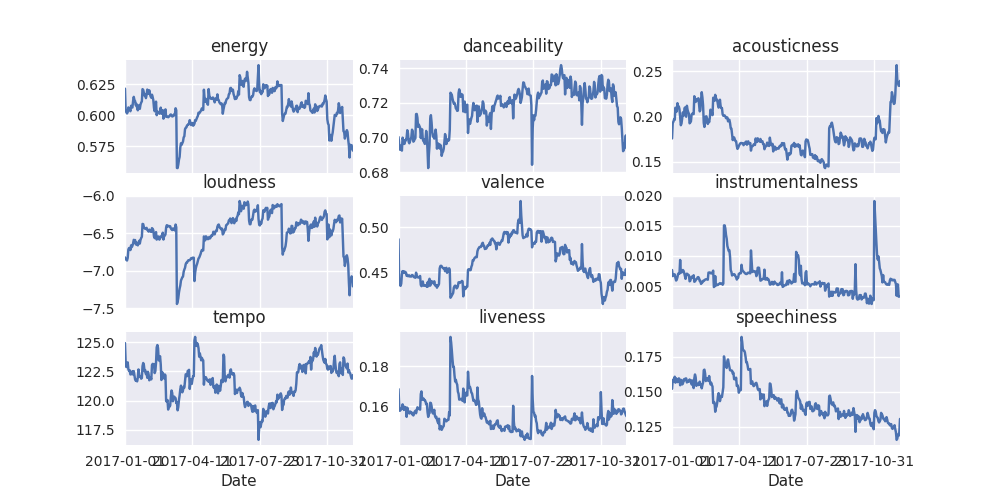

In [91]:
# a_features = ['energy', 'loudness', 'tempo', 'danceability', 'valence','acousticness']
# b_features = ['instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(10, 5))
x=0
y=0
for feature in features:
    df[feature].plot(ax=axes[x,y], title=feature);
    if x<2:
        x=x+1
    elif y<2:
        y=y+1
        x=0
     

<IPython.core.display.Javascript object>


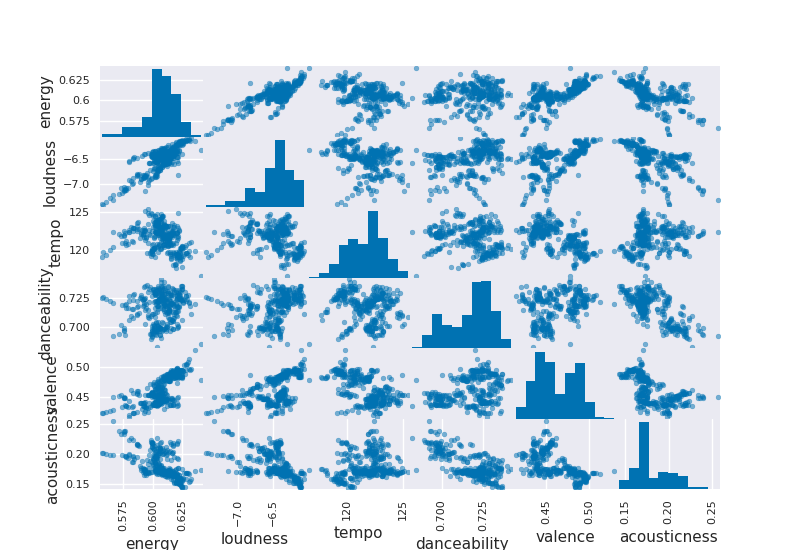

In [120]:
plt.style.use('seaborn-colorblind')
a_features = ['energy', 'loudness', 'tempo', 'danceability', 'valence','acousticness']
pd.tools.plotting.scatter_matrix(df[a_features]);

<IPython.core.display.Javascript object>


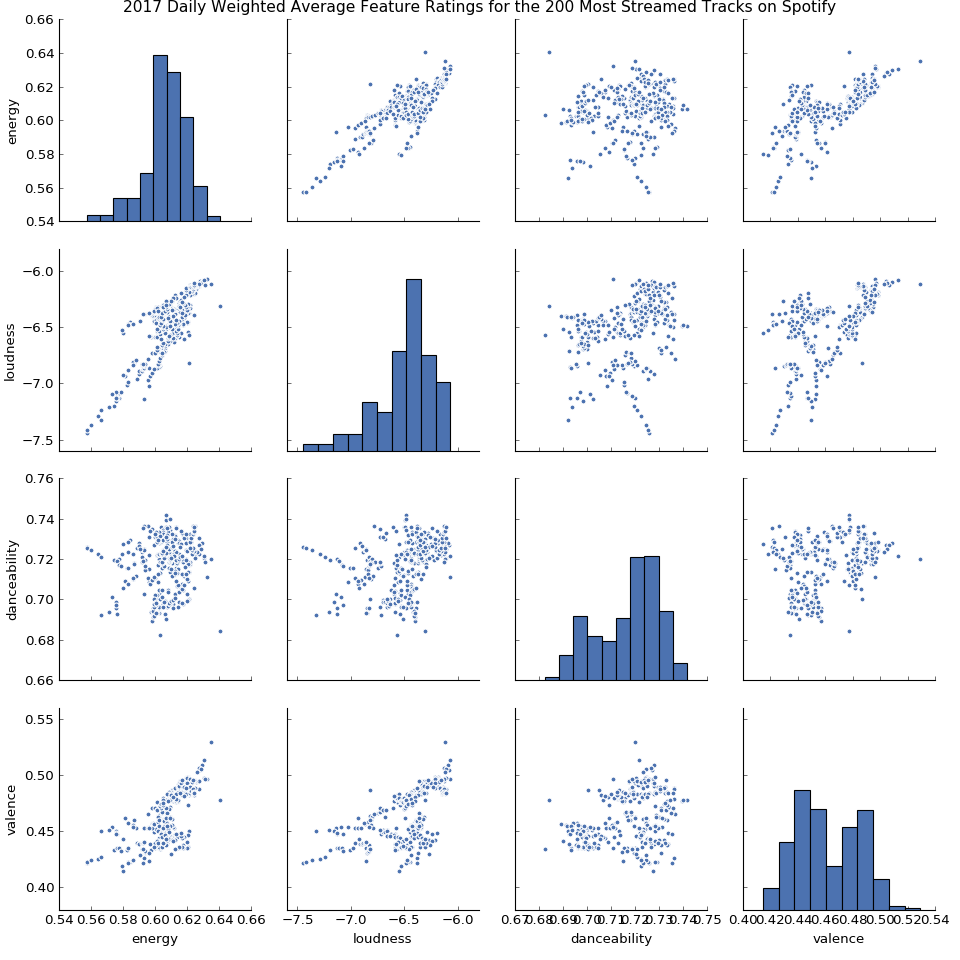

In [239]:
# drop tempo because there don't seem to be any strong correlations
# low valence high energy/loud tracks might be metal, punk, etc.
plt.style.use('seaborn-deep')
b_features = ['energy', 'loudness', 'danceability', 'valence']
title='2017 Daily Weighted Average Feature Ratings for the 200 Most Streamed Tracks on Spotify'
sns_fig = sns.pairplot(df[b_features], diag_kind='kde', size=3);
sns_fig.fig.suptitle(title, y=1.0, fontsize=14);
# acousticness appearsto be negatively correlated with danceability, energy, loudness

In [237]:
sns_fig.savefig('Course2-Assignment4.png')

           energy    loudness       tempo  danceability     valence  \
count  194.000000  194.000000  194.000000    194.000000  194.000000   
mean     0.610113   -6.404464  122.039686      0.718206    0.457491   
std      0.150659    2.158096   27.811560      0.123943    0.216178   
min      0.245000  -13.100000   68.191000      0.314000    0.039900   
25%      0.498250   -7.542500   99.992500      0.641250    0.299750   
50%      0.610500   -6.224000  121.052000      0.732000    0.430000   
75%      0.734000   -4.774500  140.756000      0.800750    0.629500   
max      0.934000   -1.075000  199.864000      0.953000    0.966000   

         liveness  acousticness  instrumentalness  speechiness  
count  194.000000    194.000000        194.000000   194.000000  
mean     0.151203      0.161004          0.005408     0.142347  
std      0.093004      0.168490          0.032908     0.121761  
min      0.045600      0.000259          0.000000     0.023200  
25%      0.094525      0.038025    

<IPython.core.display.Javascript object>


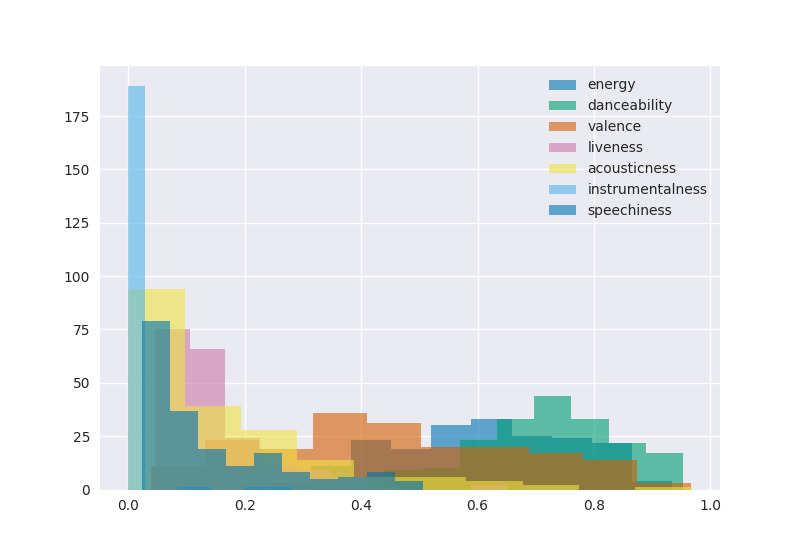

In [149]:
df4.columns = ['count']
df4.index.rename('id', inplace=True)
cols = ['count'] + features
df5 = pd.merge(df4, df2, left_index=True, right_index=True, how='inner')
df5 = df5[cols]

print(df5[features].describe())

c_features = ['energy', 'danceability', 'valence', 
            'liveness', 'acousticness', 'instrumentalness', 'speechiness']

plt.figure()
for feature in c_features:   
    plt.hist(df5[feature], alpha=0.6, label=feature);
plt.legend();

<IPython.core.display.Javascript object>


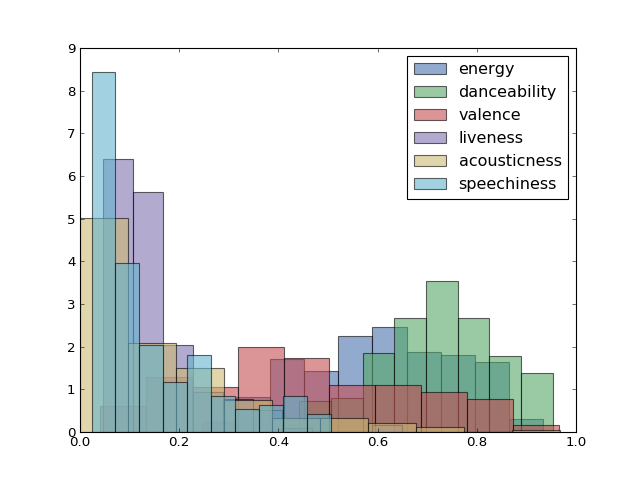

In [221]:
#drop 'instrumentalness', 'acousticness', 'speechiness' because it doesn't seem to be telling us much besides the face that songs have vocals
c_features = ['energy', 'danceability', 'valence', 'liveness','acousticness', 'speechiness']

save_fig = plt.figure()
for feature in c_features:   
    plt.hist(df5[feature], alpha=0.6, label=feature, normed=True);
#v3 = np.concatenate(df5[features])
#sns.kdeplot(df5[features]);
plt.legend();

In [222]:
save_fig.savefig('Course2-Assignment4-histogram.png')

<IPython.core.display.Javascript object>


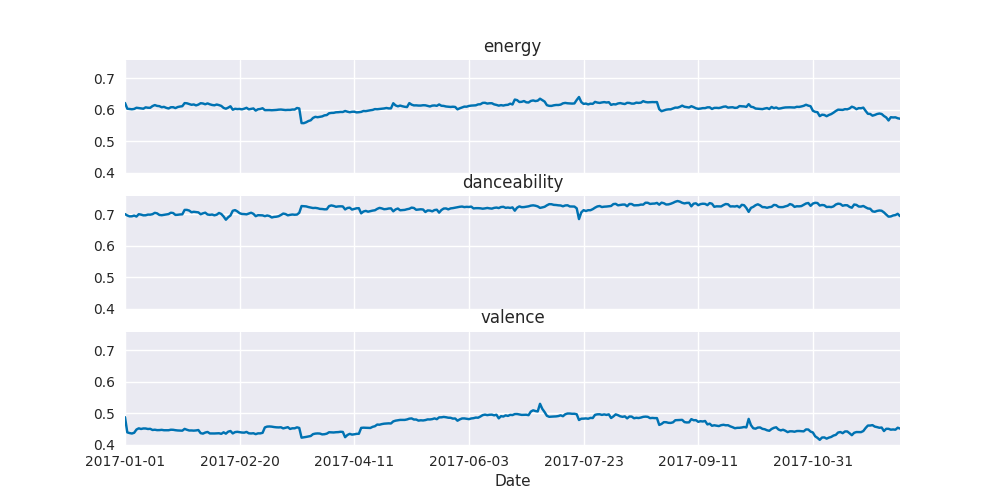

In [146]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(10, 5))
x=0
y=0
c_features = ['energy', 'danceability', 'valence']
for feature in c_features:
    df[feature].plot(ax=axes[x], title=feature);
    x=x+1

<IPython.core.display.Javascript object>


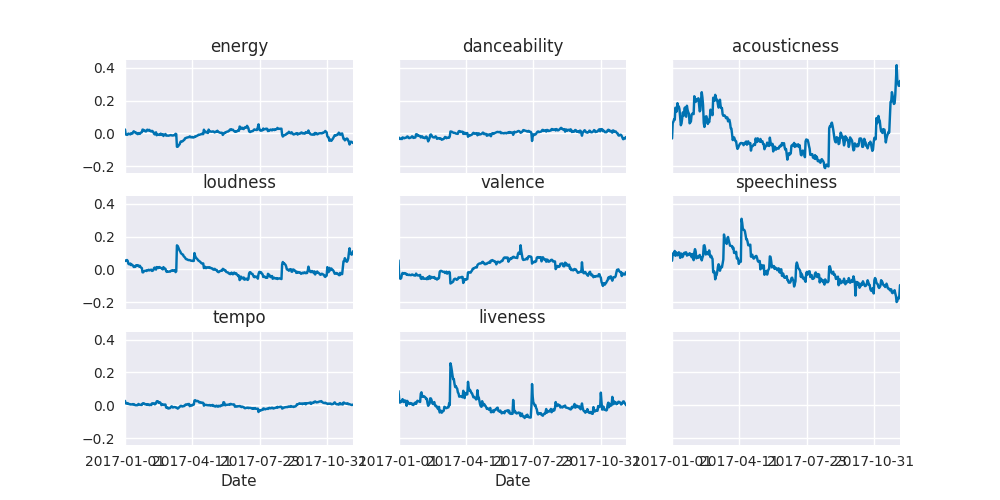

In [163]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(10, 5))
x=0
y=0
for feature in features:
    temp = (df[feature]-df[feature].mean())/df[feature].mean()
    if feature == 'instrumentalness':
        pass
    else:
        temp.plot(ax=axes[x, y], title=feature);
        if x<2:
            x=x+1
        elif y<2:
            y=y+1
            x=0


<IPython.core.display.Javascript object>


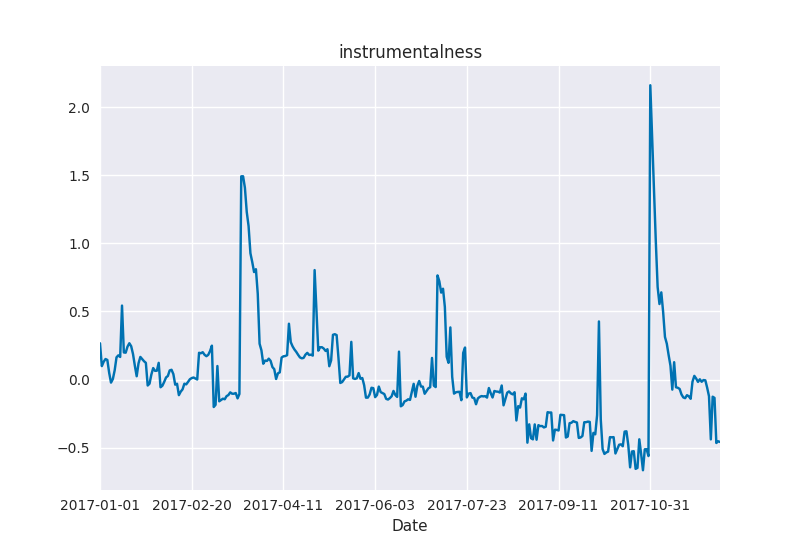

In [162]:
temp = (df['instrumentalness']-df['instrumentalness'].mean())/df['instrumentalness'].mean()
plt.figure()
temp.plot(title='instrumentalness');